<a href="https://colab.research.google.com/github/Nehasirurmath/Analysis/blob/main/Project_2_Cab_fare_prediction_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#prerequisites
Data science is a process to get some meaningful information from the masove amount of data.it is mixture of varous tools,algorithms,and macine learning and deep learning concepts to discover hidden pattern from raw and unstructured data.

#Uber Data Analysis
Data analysis is basically a technique to understand your data using statistics concept...
**feature engineering** process is basically used to create new feature from existing data more deeply...**machine learning** is subset of Artificial intelligence that allows the system to automatically learn and improve from experience without being explicitly programmed..**supervised learning** works as a supervisor.basically,we teach or train machine with labelled data.then we tst our model with some unknown set of data amd predict the level for them..**Regression** stands for to model a target value based on independent variables and linear regression is used to find the relationship between dependent(y) and independent variable (x).

In [1]:
import pandas as pd  #data manipulation
from sklearn.linear_model import LogisticRegression,LinearRegression
import numpy as np #mathematical calulation
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import itertools
import gc
import os
import sys
%matplotlib inline

In [2]:
!wget http://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv

--2021-11-27 09:34:20--  http://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv [following]
--2021-11-27 09:34:21--  https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ncqb2ctkg7da11k/weather.csv [following]
--2021-11-27 09:34:21--  https://www.dropbox.com/s/raw/ncqb2ctkg7da11k/weather.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0d7e91e9cbeac4c630ab42cde3.dl.dropboxusercontent.com/cd/0/inline/BazzM-KpZYo-OJkAkUODmzvbVWwO-y5okc8x-YccGqO70KhPMxEsZhqlKEYzsRkQf

In [3]:
!wget http://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv

URL transformed to HTTPS due to an HSTS policy
--2021-11-27 09:34:43--  https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.81.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.81.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/brixkogrmhan6ed/cab_rides.csv [following]
URL transformed to HTTPS due to an HSTS policy
--2021-11-27 09:34:44--  https://www.dropbox.com/s/raw/brixkogrmhan6ed/cab_rides.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc87c6be1a9a056284f5c23f722b.dl.dropboxusercontent.com/cd/0/inline/Bax9W7-vBeYrg1e4gg5UhAi4zz7BD0PAhjs6O19MFO4qrgtfuqUh9fPV3bDJ13WZC40DP4cZKlQXHMgcuKSYznwoxmt9mh2TSYVb5E-Qv7AJ-Iq9Bcm8M28-orSK7RuBnMTqW0G1174WFPcognPuCq2N/file# [following]
--2021-11-27 09:34:44--  https://uc87c6be1a9a056284f5c23f722b.dl.dropboxusercontent.com/cd

In [4]:
# memory saving function credit to https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
  start_mem=df.memory_usage().sum()/1024**2

  for col in df.columns:
    col_type=df[col].dtype

    if col_type !=object:
      c_min=df[col].min()
      c_max=df[col].max()
      if str(col_type)[:3]=='int':
        if c_min>np.iinfo(np.int8).min and c_max <np.iinfo(np.int8).max:
          df[col]=df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max <np.iinfo(np.int16).max:
          df[col]=df[col].astype(np.int16)  
        elif c_min > np.iinfo(np.int32).min and c_max <np.iinfo(np.int32).max:
          df[col]=df[col].astype(np.int32)  
        elif c_min > np.iinfo(np.int64).min and c_max <np.iinfo(np.int64).max:
          df[col]=df[col].astype(np.int64)    

      else:
         if c_min > np.iinfo(np.float32).min and c_max <np.iinfo(np.float32).max:
           df[col]=df[col].astype(np.float32)
         else:
           df[col]=df[col].astype(np.float64)
        

  end_mem = df.memory_usage().sum()/1024**2
  print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
      start_mem,end_mem,100*(start_mem-end_mem)/start_mem))
  return df
      
  




In [5]:
cab_data=pd.read_csv("cab_rides.csv") #data stored in cab_data variable from csv 
#cab_data=reduce_mem_usage(cab_data) #reduce fun actually shows how much dataset it get reduced
weather_data=pd.read_csv("weather.csv")
#weather_data=reduce_mem_usage(weather_data)

In [6]:
cab_data.head()# head() gives top 5 records

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [7]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [8]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

we actually have no idea how our attributes works..so use to date fun..

In [9]:
import datetime #to_datetime convert string to date time using panda ke
cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['datetime']=pd.to_datetime(weather_data['time_stamp'])

In [12]:
cab_data['datetime']

0        1970-01-01 00:25:44.952607890
1        1970-01-01 00:25:43.284023677
2        1970-01-01 00:25:43.366822198
3        1970-01-01 00:25:43.553582749
4        1970-01-01 00:25:43.463360223
                      ...             
693066   1970-01-01 00:25:43.708385534
693067   1970-01-01 00:25:43.708385534
693068   1970-01-01 00:25:43.708385534
693069   1970-01-01 00:25:43.708385534
693070   1970-01-01 00:25:43.708385534
Name: datetime, Length: 693071, dtype: datetime64[ns]

In [13]:
weather_data['datetime']

0      1970-01-01 00:00:01.545003901
1      1970-01-01 00:00:01.545003901
2      1970-01-01 00:00:01.545003901
3      1970-01-01 00:00:01.545003901
4      1970-01-01 00:00:01.545003901
                    ...             
6271   1970-01-01 00:00:01.543819974
6272   1970-01-01 00:00:01.543819974
6273   1970-01-01 00:00:01.543819974
6274   1970-01-01 00:00:01.543819974
6275   1970-01-01 00:00:01.543819974
Name: datetime, Length: 6276, dtype: datetime64[ns]

In [10]:
cab_data.shape #tells how many rows n colmuns it has

(693071, 11)

In [11]:
weather_data.shape

(6276, 9)

In [14]:
weather_data.describe() #conceprt ocab_data.des

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [15]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.189430,1.544046e+12,16.545125,1.013870
std,1.138937,6.891925e+08,9.324359,0.091641
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [16]:
a=pd.concat([cab_data,weather_data])

In [17]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
import pandas as pd

In [20]:
#a['day']=pd.to_datetime(a['day'])
#a['hour']=a.date_time.dt.hour
#cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'])

KeyError: ignored

In [ ]:
a.head()

In [22]:
a.fillna(0,inplace=True) #the nan values used to have replacaed by 0

In [23]:
a.columns #columns are after combineing of 2 datasets

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')

In [24]:
a.groupby('cab_type').count() #used to return columns you have provide

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind
cab_type,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


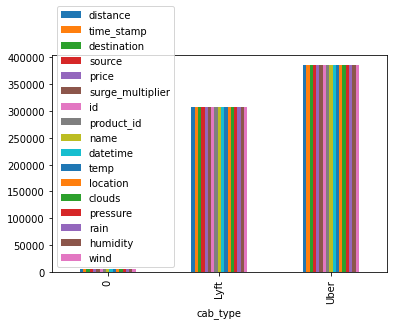

In [25]:
a.groupby('cab_type').count().plot.bar()

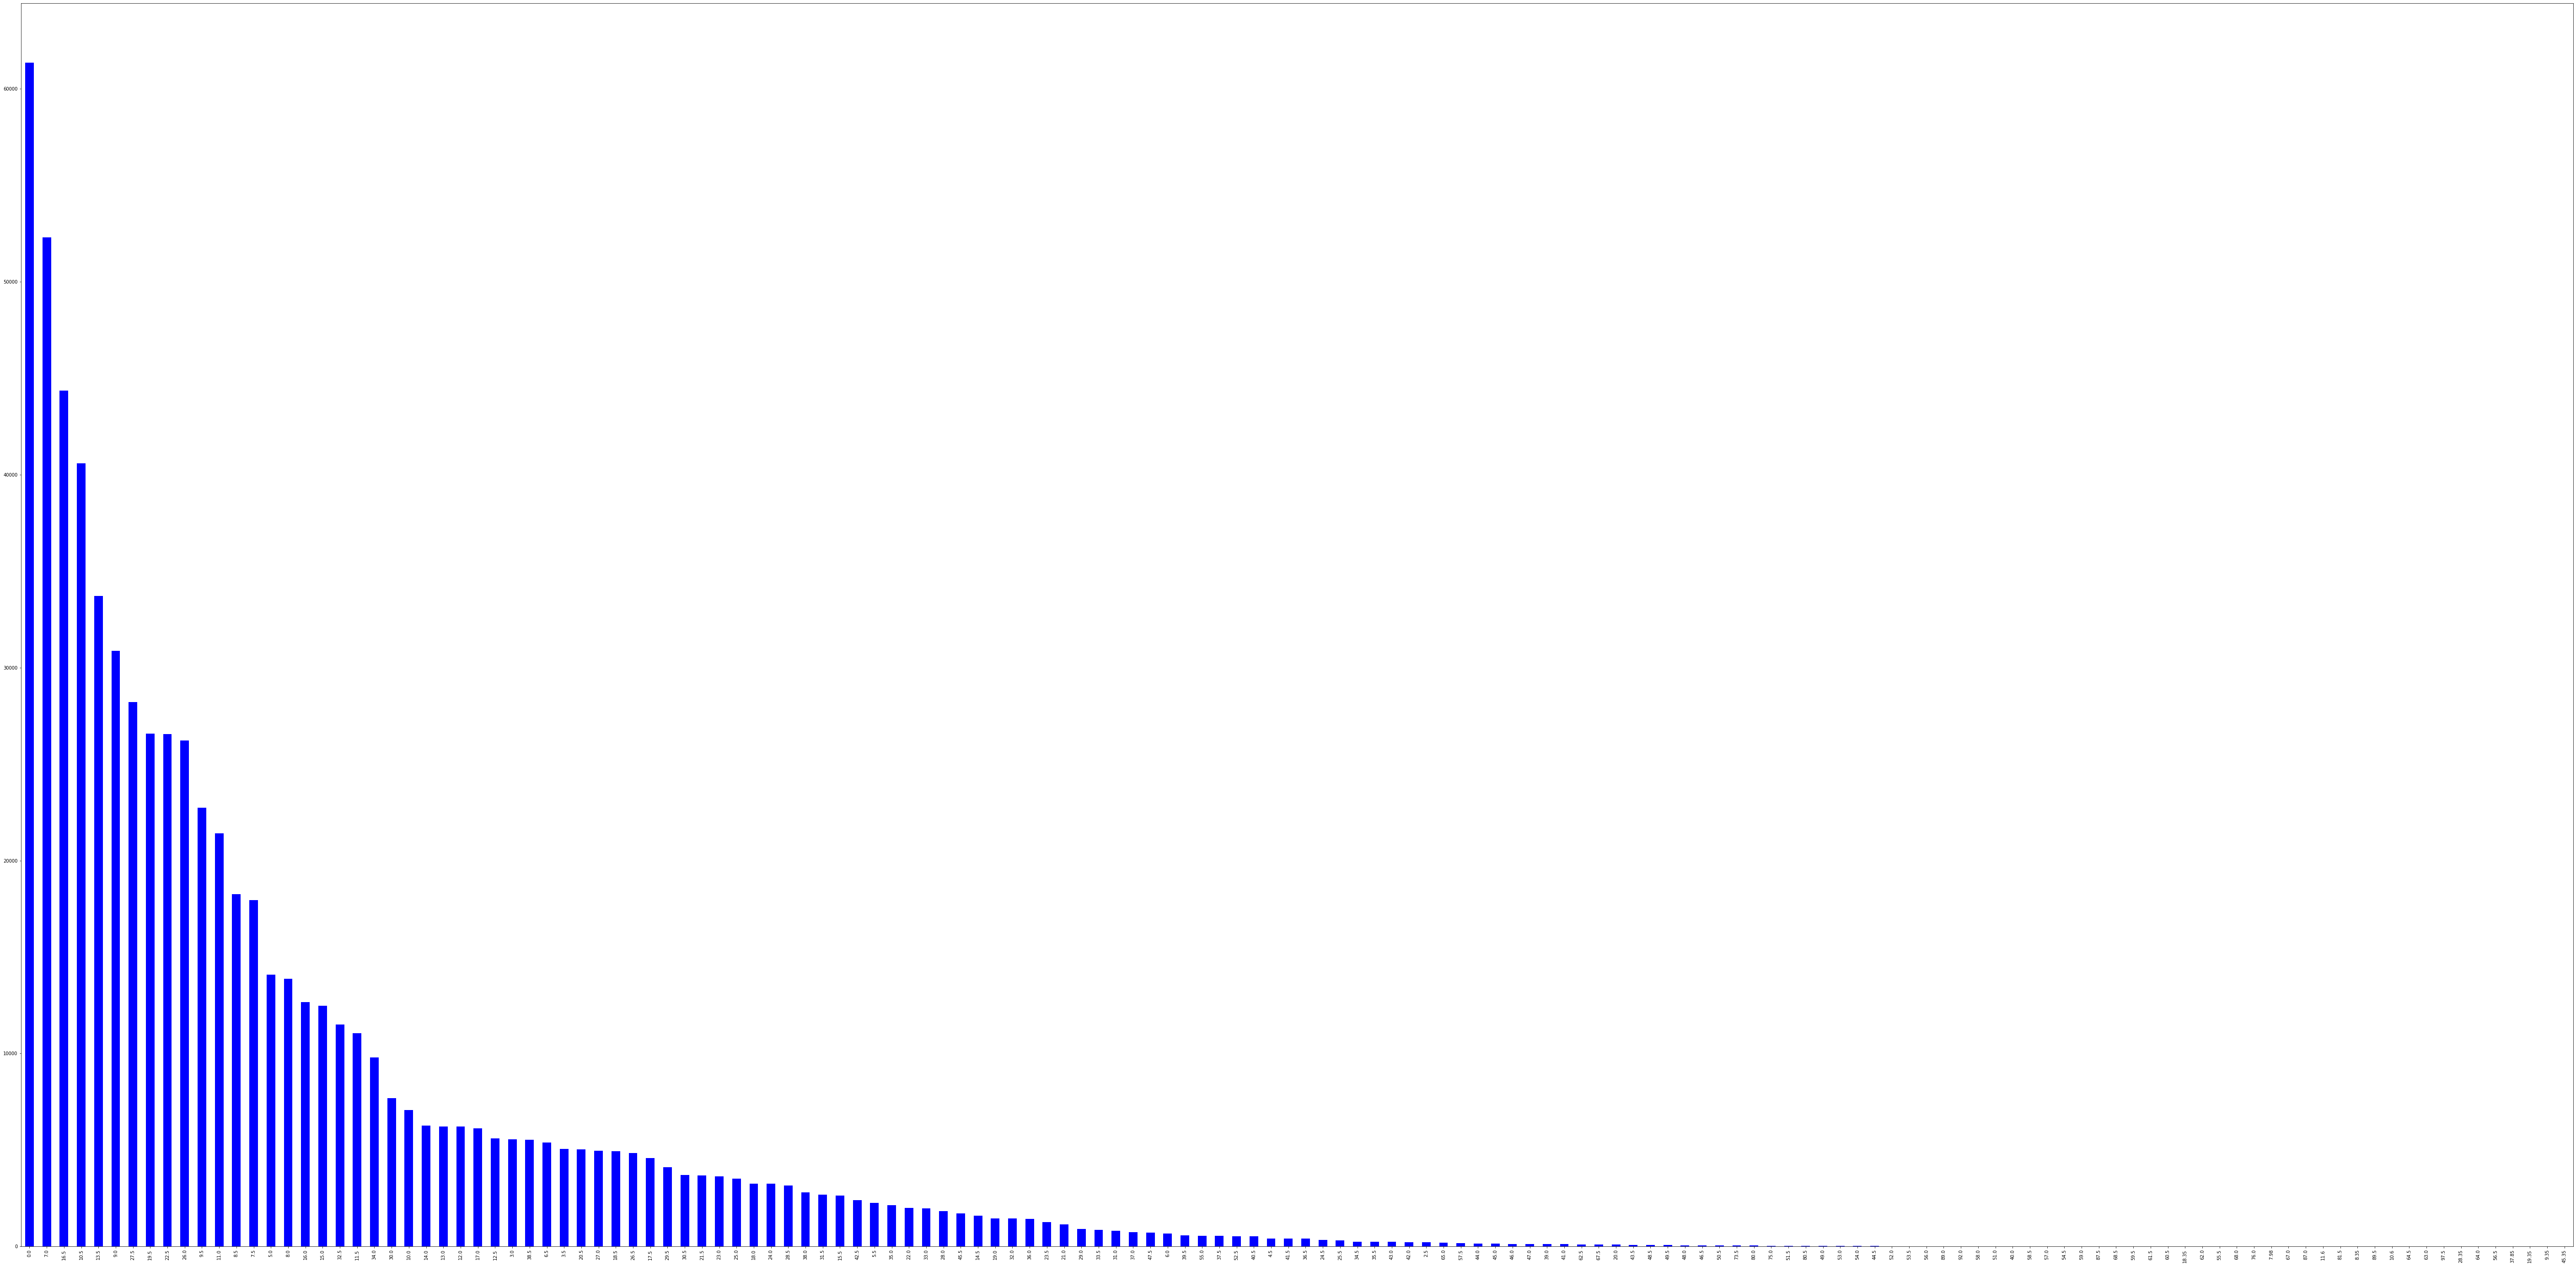

In [26]:
a['price'].value_counts().plot(kind='bar',figsize=(100,50),color='blue')

In [ ]:
a['hour'].value_counts().plot(kind='bar',figsize=(10,5),color='blue')

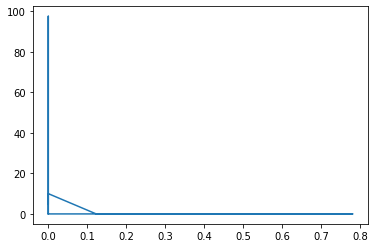

In [29]:
import matplotlib.pyplot as plt
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [30]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind'],
      dtype='object')

In [31]:
x1=a[['distance','temp','clouds','pressure','humidity',"wind",'rain','surge_multiplier','clouds']]
y1=a['price']

In [32]:
#using skicit-learn to split data intomtraining and testing sets
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
x_train,y_train,x_test,y_test=train_test_split(x1,y1,test_size=0.25,random_state=42)

In [33]:
linear=LinearRegression()
linear.fit(x_train,x_test)
x_train = x_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [34]:
predictions=linear.predict(y_train)
y_train = y_train.replace((np.inf, -np.inf, np.nan), 0).reset_index(drop=True)

In [ ]:
df1=df.head(25)
df1.plot(kind="bar",figsize=(26,10))

plt.grid(which='major',linestye='-',lineWidth='0.5',color="green")
plt.grid(which='minor',linestye=':',lineWidth='0.5',color="black")